Image processing using Autoencoder

Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
     

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape
     

(10000, 28, 28, 1)

Exploratory Data Analysis

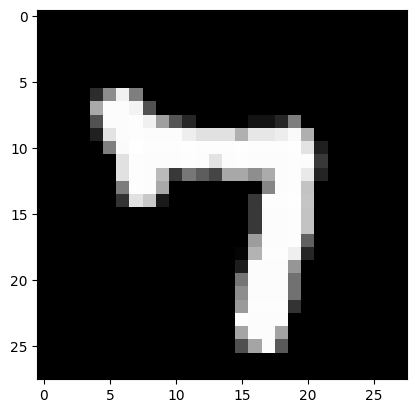

In [5]:

# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

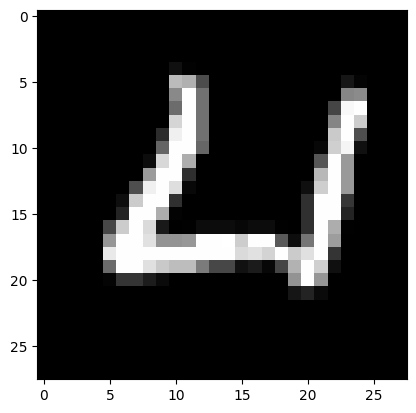

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

Model Creation

In [7]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [8]:
# train the model
model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))
     

Epoch 1/10
235/235 [==============================] - 92s 389ms/step - loss: 0.1491 - val_loss: 0.0854
Epoch 2/10
235/235 [==============================] - 88s 373ms/step - loss: 0.0821 - val_loss: 0.0786
Epoch 3/10
235/235 [==============================] - 89s 379ms/step - loss: 0.0777 - val_loss: 0.0756
Epoch 4/10
235/235 [==============================] - 91s 389ms/step - loss: 0.0756 - val_loss: 0.0739
Epoch 5/10
235/235 [==============================] - 92s 391ms/step - loss: 0.0742 - val_loss: 0.0728
Epoch 6/10
235/235 [==============================] - 90s 381ms/step - loss: 0.0731 - val_loss: 0.0721
Epoch 7/10
235/235 [==============================] - 90s 384ms/step - loss: 0.0723 - val_loss: 0.0714
Epoch 8/10
235/235 [==============================] - 92s 393ms/step - loss: 0.0717 - val_loss: 0.0711
Epoch 9/10
235/235 [==============================] - 90s 383ms/step - loss: 0.0712 - val_loss: 0.0703
Epoch 10/10
235/235 [==============================] - 91s 389ms/step - l

Visualize the Results

In [9]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)
     

313/313 [==============================] - 3s 10ms/step


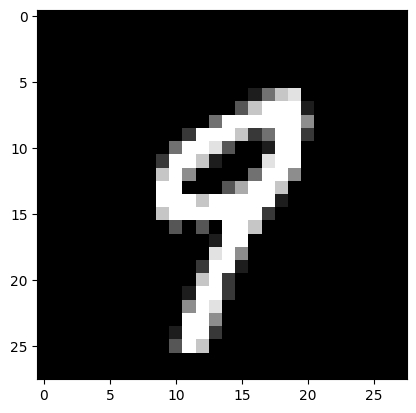

In [10]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
     

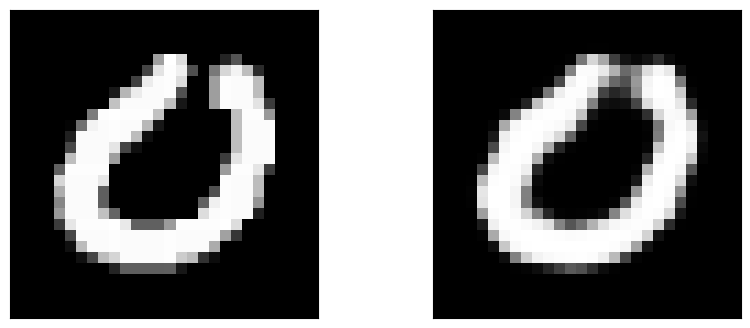

In [11]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()